# Credit Card Fraud Detection

## Description

Wtih the massive acceleration of e-commerce, online payment fraud has surged, costing businesses over $20 billion annually worldwide. For every dollar lost to fraud, businesses incur additional operational costs, network fees, and customer churn. To combat this evolving and sophisticated threat, businesses need effective fraud detection solutions that leverage the power of data and machine learning (ML).

This project aims to develop an Ml-powered fraud detection model capable of identifying fraudulent transactions. Traiditonal approaches to fraud detection often rely on brute-force rules, which can be rigid and prone to blocking legitimate transactions (false positives). In contrast, ML-based models can identify nuanced patterns that help businesses maximize revenue by striking a balance between false positives (blocking good customers and false negatives (allowing fraud to pass).

### Dataset Overview
The dataset sourced from Kaggle presents a simulated credit card transaction dataset containing genuine and fraudulent transactions from Jan 1, 2019 - Dec 31, 20202. The dataset presents a realistic challenge due to its imbalanced nature, the majority of transactions being legitimate. The presence of numerous categorical features and a large number of variables requires careful feature selection to identify the most important predictors of fraud. Key considerations for this model include:
* Imbalanced dataset: As the majority of transactions are not fraudulent, techniques such as oversampling, undersampling, or SMOTE will be explored to balance the dataset.
* Feature selection: Given the high number of features, identifying the most important variables will be crucial to model performance and efficiency.
* Handling categorical variables: Appropriate encoding strategies (e.g. one-hot encoding or target encoding) will be applied to convert categorical variables for the ML model.

### Key Components of the Project
1. Data Preprocessing: Cleaning the dataset, balancing the classes, handling missing values, and encoding categorical features.
2. Feature Engineering: Identifying the most predictive features, reducing dimensionality, and optimizing model performance.
3. Model Development: Implementing a fraud detection model using techniques like logistic regression, decision trees, random forests, or gradient boosting, with a focus on improving precision and recall.
4. Model Evaluation: Evaluating model performance using metrics such as F1 score, precision, recall, and the ROC-AUC curve to understand the trade-offs between false positives and false negatives.

The goal is to build a robust, adaptive fraud detection model that helps businesses prevent fraud efficiently while minimizing disruption to legitimate customer transactions.

Sources: 
* [Kaggle: Credit Card Transactions Fraud Detection Dataset](https://www.kaggle.com/datasets/kartik2112/fraud-detection/data)
* [Kaggle: Best techniques and metrics for Imbalanced Dataset](https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset)
* [Kaggle: Credit card Fraud Balance is Key](https://www.kaggle.com/code/ohseokkim/creditcard-fraud-balance-is-key-feat-pycaret)
* [Stripe: Risk Evaluation - Access the Stripe Radar risk evaluations in the Dashboard and the API](https://docs.stripe.com/radar/risk-evaluation)
* [Stripe: How Stripe uses ML for Fraud Detection](https://stripe.com/guides/primer-on-machine-learning-for-fraud-protection)
* [AWS: Banking Fraud Detection with Machine Learning and Real-time analytics on AWS](https://aws.amazon.com/blogs/industries/banking-fraud-detection-with-machine-learning-and-real-time-analytics-on-aws/)
* [Fine-tuned LLM on Fraud Detection](https://huggingface.co/Bilic/Mistral-7B-LLM-Fraud-Detection)

In [476]:
pip install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement imblearn==0.12.4 (from versions: 0.0)
ERROR: No matching distribution found for imblearn==0.12.4
Note: you may need to restart the kernel to use updated packages.


In [477]:
# Or install these packages individually
!pip install folium
!pip install imblearn
!pip install -U matplotlib
!pip install numpy
!pip install openai
!pip install pandas
!pip install plotly
!pip install -U scikit-learn
!pip install scipy
!pip install seaborn
!pip install streamlit
!pip install watchdog
!pip install xgboost

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

In [446]:
url = 'https://media.githubusercontent.com/media/itancio/churn/refs/heads/main/notebook/fraud/fraudTrain.csv'
raw_df = pd.read_csv(url, index_col=0)

raw_df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [447]:
raw_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


### Handle missing values

In [451]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop               

In [518]:
processed_df = raw_df.dropna()
processed_df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


### Check and drop duplicates

In [521]:
# Display all duplicate rows
duplicates = processed_df[raw_df.duplicated(keep=False)]
print('Duplicates: ', duplicates)

# Drop duplicated values
processed_df.drop_duplicates(inplace=True)

Duplicates:  Empty DataFrame
Columns: [trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud]
Index: []

[0 rows x 22 columns]


## Data Imbalance Check

In [524]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

In [526]:
labels=["Genuine","Fraud"]

fraud_or_not = processed_df["is_fraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]
total = sum(values)
fraud_percent = fraud_or_not[0] / total * 100
non_fraud_percent = fraud_or_not[1] / total * 100
print(f"Total: {total}")
print(f"Non-fraudulent Transactions: {values[0]} or {fraud_percent: .2f}% of the dataset")
print(f"Fraudulent Transactions: {values[1]} or {non_fraud_percent: .2f}% of the dataset")


Total: 1296675
Non-fraudulent Transactions: 1289169 or  99.42% of the dataset
Fraudulent Transactions: 7506 or  0.58% of the dataset


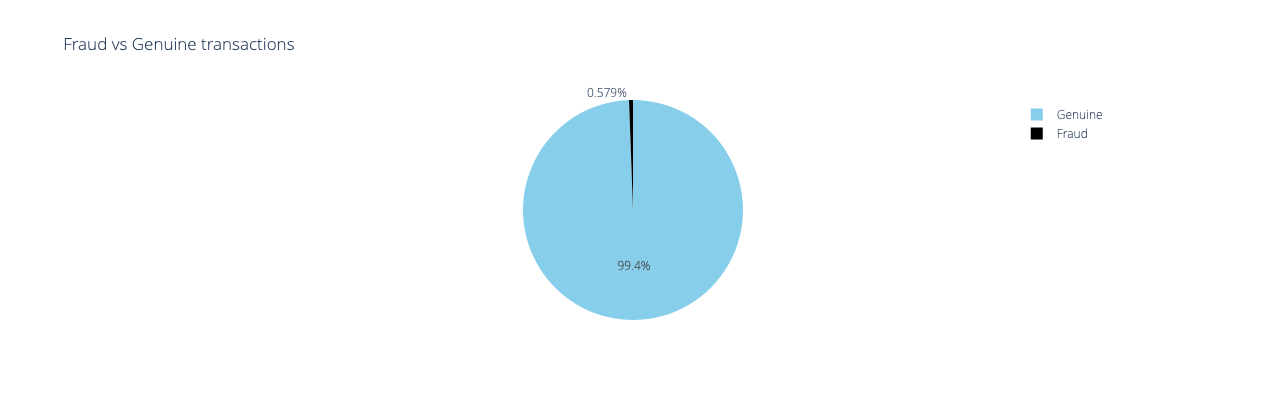

In [528]:
fig = px.pie(values=raw_df["is_fraud"].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()

This pie chart below highlights the significant imbalance in our dataset, with the vast majority of transactions being non-fraudulent. Specifically, 

* 99.42% (1289169 / 1296675) of the data represents non-fraudulent transactions

* 0.58% (7506 / 1296675) are labeled as fraudulent.


This imbalance poses a challenge for model evaluation, as using accuracy as a performance metric could be misleading—yielding high accuracy simply due to the prevalence of non-fraudulent transactions. To ensure a more realistic assessment, we should consider alternative metrics like precision, recall, or F1-score, which better account for the minority class.

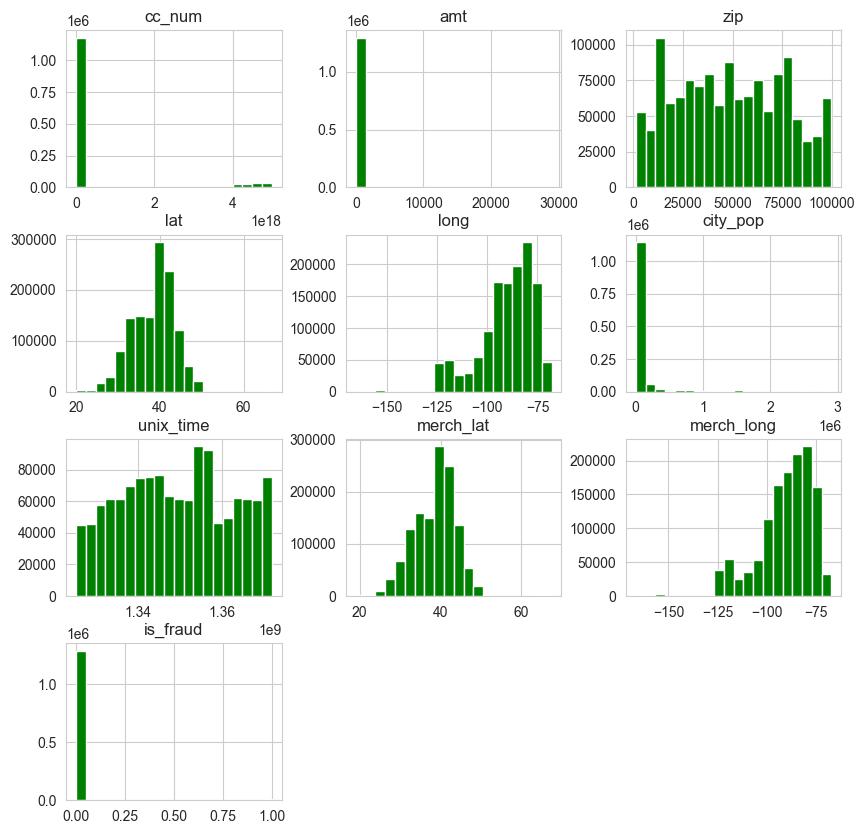

In [531]:
raw_df.hist(bins = 20, figsize = (10,10), color = 'g');

In [533]:
# import folium

# # Create a base map centered at the mean of latitude and longitude
# map_fraud = folium.Map(location=[train_df['lat'].mean(), train_df['long'].mean()], zoom_start=1)

# # Iterate through the DataFrame to add markers with different colors
# for index, row in train_df.iterrows():
#     # Set the marker color based on 'is_fraud' column
#     marker_color = 'red' if row['is_fraud'] == 1 else 'blue'
    
#     # Add a marker to the map
#     folium.Marker(
#         location=[row['lat'], row['long']],
#         popup=f"customer: {row['first']}, Fraud: {row['is_fraud']}",
#         icon=folium.Icon(color=marker_color)
#     ).add_to(map_fraud)

# # Display the map
# map_fraud

Text(0.5, 1.0, 'Amount Distribution by Fraud')

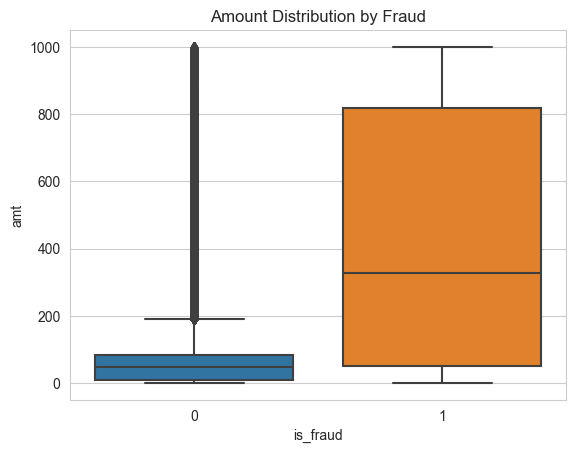

In [535]:
amount_df = processed_df.query('amt < 1000')

sns.boxplot(x='is_fraud', y='amt', data=amount_df)
plt.title('Amount Distribution by Fraud')


In [539]:
columns = list(processed_df.columns)
columns

['trans_date_trans_time',
 'cc_num',
 'merchant',
 'category',
 'amt',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'trans_num',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud']

## Display unique values in the all fraud dataset

In [542]:
uniq_values = processed_df.nunique()
uniq_values

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [544]:
fraud_df = raw_df.query('is_fraud == 1')
fraud_df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1


In [546]:
# Calculate unique category counts
states_counts = fraud_df['state'].value_counts().reset_index()

# Rename columns for better readability
states_counts.columns = ['state', 'Count']

# Display the states counts
states_counts

,state,Count
0,NY,555
1,TX,479
2,PA,458
3,CA,326
4,OH,321
5,FL,281
6,IL,248
7,MI,238
8,AL,215
9,MN,207


In [548]:
# Calculate unique job counts
job_counts = fraud_df['job'].value_counts().reset_index()

# Rename columns for better readability
job_counts.columns = ['job', 'Count']

# Display the states counts
job_counts

,job,Count
0,Materials engineer,62
1,Trading standards officer,56
2,Naval architect,53
3,Exhibition designer,51
4,"Surveyor, land/geomatics",50
...,...,...
438,Statistician,3
439,Health physicist,3
440,Chartered loss adjuster,3
441,English as a second language teacher,2


In [550]:
# Calculate unique city counts
city_counts = fraud_df['city'].value_counts().reset_index()

# Rename columns for better readability
city_counts.columns = ['City', 'Count']

# Display the city counts
city_counts

,City,Count
0,Houston,39
1,Warren,33
2,Huntsville,29
3,Naples,29
4,Dallas,27
...,...,...
697,Florence,3
698,Kilgore,2
699,Phoenix,2
700,Phenix City,2


In [552]:
# Calculate unique zip counts
zip_counts = fraud_df['zip'].value_counts().reset_index()

# Rename columns for better readability
zip_counts.columns = ['zip', 'Count']

# Display the city counts
zip_counts

,zip,Count
0,15010,24
1,48088,23
2,16034,21
3,82514,21
4,68375,19
...,...,...
749,33811,2
750,36869,2
751,85020,2
752,28405,2


In [554]:
# Calculate unique category counts
category_counts = fraud_df['category'].value_counts().reset_index()

# Rename columns for better readability
category_counts.columns = ['category', 'Count']

# Display the city counts
category_counts

,category,Count
0,grocery_pos,1743
1,shopping_net,1713
2,misc_net,915
3,shopping_pos,843
4,gas_transport,618
5,misc_pos,250
6,kids_pets,239
7,entertainment,233
8,personal_care,220
9,home,198


In [556]:
# Calculate unique job counts
job_counts = fraud_df['job'].value_counts().reset_index()

# Rename columns for better readability
job_counts.columns = ['job', 'Count']

# Display the city counts
job_counts

,job,Count
0,Materials engineer,62
1,Trading standards officer,56
2,Naval architect,53
3,Exhibition designer,51
4,"Surveyor, land/geomatics",50
...,...,...
438,Statistician,3
439,Health physicist,3
440,Chartered loss adjuster,3
441,English as a second language teacher,2


# !!!!!! TODO: DELETE OUTLIERS (OR NOT)

In [559]:
columns

['trans_date_trans_time',
 'cc_num',
 'merchant',
 'category',
 'amt',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'trans_num',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud']

In [561]:
boxplot_columns = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

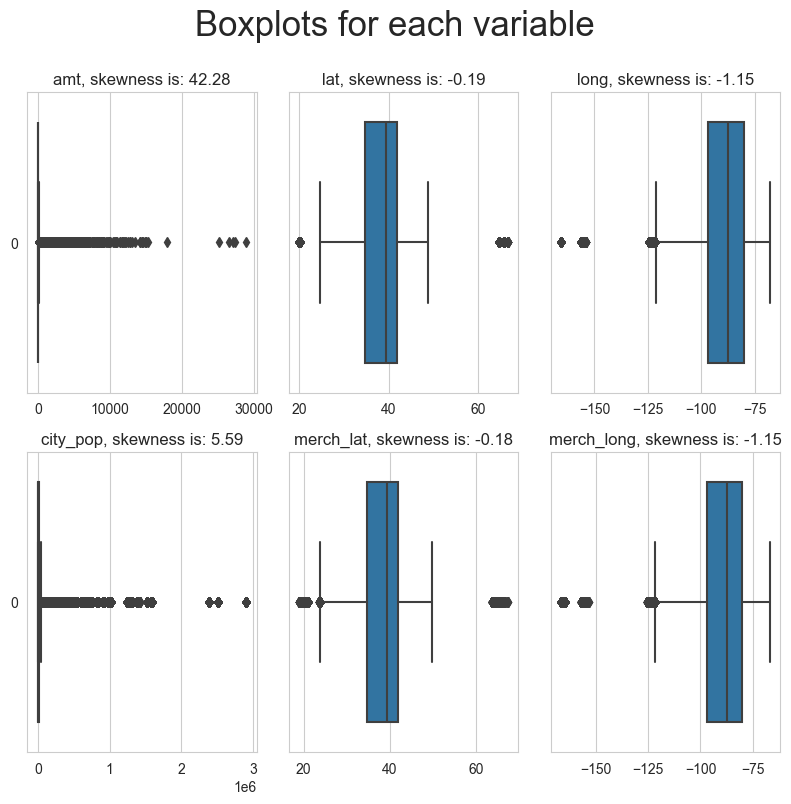

In [563]:
# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(8,8))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=processed_df, columns_list=boxplot_columns, rows=2, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

### Add Age as a feature

In [566]:
# Convert columns to datetime
processed_df['trans_date_trans_time'] = pd.to_datetime(processed_df['trans_date_trans_time'])
processed_df['dob'] = pd.to_datetime(processed_df['dob'])

# Extract the year from 'trans_date_trans_time' and 'dob'
processed_df['trans_year'] = processed_df['trans_date_trans_time'].dt.year
processed_df['dob_year'] = processed_df['dob'].dt.year

# Display the DataFrame with the extracted years
processed_df[['trans_date_trans_time', 'dob', 'trans_year', 'dob_year']]
processed_df['age'] = processed_df['trans_year'] - processed_df['dob_year']
processed_df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_year,dob_year,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019,1988,31
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019,1978,41
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019,1962,57
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019,1967,52
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019,1986,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,2020,1961,59
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,2020,1979,41
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,2020,1967,53
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,2020,1980,40


## Separate features and target variables

In [582]:
features = [
    'category', 
    'amt', 
    'age', 
    'gender',
    # 'job',
    # 'city',
    'state',
    'zip', 
    'lat', 
    'long',
    'merch_lat', 
    'merch_long'
]

train_df = processed_df[features].copy()

train_df

,category,amt,age,gender,state,zip,lat,long,merch_lat,merch_long
0,misc_net,4.97,31,F,NC,28654,36.0788,-81.1781,36.011293,-82.048315
1,grocery_pos,107.23,41,F,WA,99160,48.8878,-118.2105,49.159047,-118.186462
2,entertainment,220.11,57,M,ID,83252,42.1808,-112.2620,43.150704,-112.154481
3,gas_transport,45.00,52,M,MT,59632,46.2306,-112.1138,47.034331,-112.561071
4,misc_pos,41.96,33,M,VA,24433,38.4207,-79.4629,38.674999,-78.632459
...,...,...,...,...,...,...,...,...,...,...
1296670,entertainment,15.56,59,M,UT,84735,37.7175,-112.4777,36.841266,-111.690765
1296671,food_dining,51.70,41,M,MD,21790,39.2667,-77.5101,38.906881,-78.246528
1296672,food_dining,105.93,53,M,NM,88325,32.9396,-105.8189,33.619513,-105.130529
1296673,food_dining,74.90,40,M,SD,57756,43.3526,-102.5411,42.788940,-103.241160


In [588]:
target = processed_df['is_fraud']
target

0          0
1          0
2          0
3          0
4          0
          ..
1296670    0
1296671    0
1296672    0
1296673    0
1296674    0
Name: is_fraud, Length: 1296675, dtype: int64

### 3. Apply Categorical Encoding

In [591]:
train_df = pd.get_dummies(train_df, columns=['category', 'gender', 'state'])

train_df

,amt,age,zip,lat,long,merch_lat,merch_long,category_entertainment,category_food_dining,category_gas_transport,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,4.97,31,28654,36.0788,-81.1781,36.011293,-82.048315,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,107.23,41,99160,48.8878,-118.2105,49.159047,-118.186462,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,220.11,57,83252,42.1808,-112.2620,43.150704,-112.154481,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,45.00,52,59632,46.2306,-112.1138,47.034331,-112.561071,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,41.96,33,24433,38.4207,-79.4629,38.674999,-78.632459,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,15.56,59,84735,37.7175,-112.4777,36.841266,-111.690765,True,False,False,...,False,False,False,True,False,False,False,False,False,False
1296671,51.70,41,21790,39.2667,-77.5101,38.906881,-78.246528,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1296672,105.93,53,88325,32.9396,-105.8189,33.619513,-105.130529,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1296673,74.90,40,57756,43.3526,-102.5411,42.788940,-103.241160,False,True,False,...,True,False,False,False,False,False,False,False,False,False


### 4. Scaling the dataset

In [594]:
from sklearn.preprocessing import StandardScaler

In [369]:
scaler = StandardScaler()

X_train = scaler.fit_transform(train_df)

print(X_train.shape)

(555719, 73)


### Split the dataset

In [596]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df, target, test_size=0.2, random_state=42)

## Training the model

In [599]:
from sklearn.linear_model import LogisticRegression

In [601]:
lr_model = LogisticRegression(random_state=42)

In [603]:
lr_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=42)

## Prediction

In [605]:
lr_predictions = lr_model.predict(X_test)
lr_predictions

array([0, 0, 0, ..., 0, 0, 0])